Example of using GRiTS to fine-grain (i.e. backmap) a CG compound to an atomistic one.

Right now, to run this notebook you'll need to install from a fork of GRiTS.

```
git clone git@github.com:chrisjonesBSU/grits.git
cd grits
git checkout fine-grain
conda env create -f environment.yml
pip install .
conda activate grits
```

In [1]:
import warnings
warnings.filterwarnings("ignore")

import grits
from grits.finegrain import backmap_snapshot_to_compound
import gsd.hoomd
import mbuild as mb
import time

/Users/stephaniemccallum/miniforge3/envs/grits/lib/python3.12/site-packages/mdtraj/formats/__init__.py:13: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  from mdtraj.formats.trr import TRRTrajectoryFile
/Users/stephaniemccallum/miniforge3/envs/grits/lib/python3.12/site-packages/foyer/forcefield.py:34: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import iter_entry_points, resource_filename
/Users/stephaniemccallum/miniforge3/envs/grits/lib/python3.12/site-packages/pkg_resources/__init__.py:3138: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)



Support for writing out LAMMPS data files will be removed
in mbuild 1.0.
See GMSO (https://github.com/mosdef-hub/gmso/tree/main/gmso/formats/lammpsdata) for
continued support for LAMMPS.



In [2]:
cg_gsd = "cg-single-chain.gsd"
with gsd.hoomd.open(cg_gsd, "r") as traj:
    snap = traj[-1]

In [3]:
cg_comp = mb.load(cg_gsd)
print("Total Particles:", cg_comp.n_particles)
cg_comp.visualize(bead_size=4).show()

Total Particles: 150


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
styrene = mb.load("C=CC1=CC=CC=C1",smiles=True)

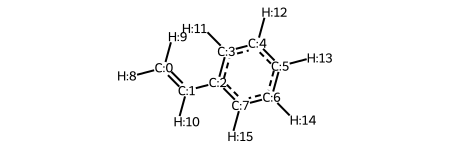

In [6]:
styrene.to_rdkit()

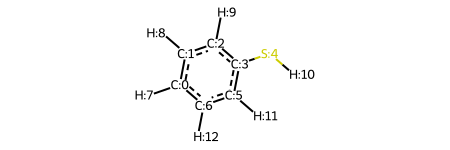

In [6]:
pps = mb.load("c1ccc(S)cc1",smiles=True)
pps.to_rdkit()

In [3]:
bead_mapping = {"A": "C=CC1=CC=CC=C1"} # Mapping one A bead to 1 Polystyrene monomer
# We have to tell GRiTS which atoms on the Polystyrene monomer are used to form monomer-monomer bonds
head_indices = {"A": [10]}
tail_indices = {"A": [9]}

start = time.time()

fg_comp = backmap_snapshot_to_compound(
    snapshot=snap,
    bead_mapping=bead_mapping,
    bond_head_index=head_indices,
    bond_tail_index=tail_indices,
    ref_distance=0.3438, # The example GSD file used reduced simulation units, this puts distances back into nm.
    energy_minimize=False, # Minimize sub-groups of atomistic monomers as the fine-grain structure is being created. Still needs testing/debugging
)

end = time.time()
print("Total Time:", end - start)

Total Time: 2.174791097640991


In [4]:
print("Total Particles:", fg_comp.n_particles)
fg_comp.visualize().show()

Total Particles: 2100


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Next Step: Energy minimize...
# mBuild c

In [7]:
fg_comp.energy_minimize(steps=2500)

In [9]:
fg_comp.save("fg.mol2", overwrite=True)

In [11]:
fg_comp.visualize().show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.